In [1]:
# import modules (numpy is used only to create data)
import numpy as np
import h5py

In [2]:
# create some data
data = np.ones([10, 10, 10])

In [3]:
# create an hdf5 file
f = h5py.File("test.h5", "w")
# create a dataset from existing data
dst = f.create_dataset("ones", data=data)

In [4]:
# check that everything is ok, by printing the first item of the dataset
f["ones"][0]

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [5]:
# create a group, and a second dataset inside it, with a specific size
grp = f.create_group("/cool_data")
dst2 = grp.create_dataset("zeros", shape=[100, 10, 10], dtype=np.int)

# fill the dataset
for i in range(100):
    dst2[i] = np.random.randint(0, 100, size=[10, 10])

In [6]:
# close the file
f.close()

In [7]:
# open the file for reading
f = h5py.File("test.h5", "r")
# print the groups / datasets
list(f.keys())

['cool_data', 'ones']

In [8]:
# print a hierachical view of the file (simple)
f.visititems(lambda x, y: print(x))

cool_data
cool_data/zeros
ones


shape, type: (100, 10, 10) int64
sum is 499485
mean is 49
std var is 29


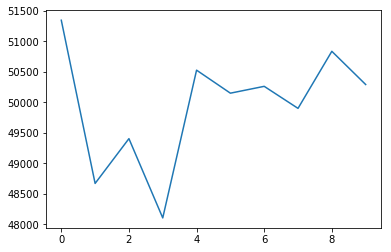

In [11]:
# get dataset
dst = f["cool_data/zeros"]
print("shape, type: %s %s" %(dst.shape, dst.dtype))

# do some operations
print("sum is %d" % dst[:].sum())
print("mean is %d" % dst[:].mean())
print("std var is %d" % dst[:].std())

# plot the projection on x axis
import matplotlib.pyplot as plt
plt.figure()
plt.plot(dst[:].sum(axis=0).sum(axis=1))
plt.show()